# \[3주차 - Day5\] Weekly Mission


## Misiisn 1. Netfilx and Code


[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:

1.넷플릭스 한국 작품('South Korea')이 몇개인지 찾아라 (단일로)

2.넷플릭스에 가장만은 작품을 만든 국가는 (단일로)

mv kaggle.json ~/.kaggle/

chmod 600 ~/.kaggle/kaggle.json

kaggle datasets download -d shivamb/netflix-shows

unzip netflix-shows.zip

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
netflix =  pd.read_csv("./netflix_titles.csv")

### 1-1. 한국 넷플릭스 찾기

In [ ]:
netflix_country = netflix.groupby(by ="country").count()
netflix_country['type']['South Korea']

### 1-2. 넷플릭스 가장만은 작품을 만든 국가

In [ ]:
netflix_country = netflix.groupby(by ="country").count()
netflix_country['show_id'].idxmax()

## Mission 2. 가즈아!

### Moving Average 이동평균법으로 비트코인 추세 알아네기

[비트코인](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)

[이더리움](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv) 

1. 비트코인의 2016.06 ~ 2017.06 기간의 5-ma(movinf average) 비트코인 가격 그래프를 그려주세요

    1-1. 선색 (#f2a900) 

    1-2. x축 y축 텍스트 쓰기

    1-3. 이동평균의 기준은 open column

2. 2016.06 ~ 2017.06 기간의 이더리움 비트코인 5-ma 같이 그리기

    2-1. 이더리움 (#3c3c3d)

    2-2. x축 y축 텍스트 쓰기

    2-3. 이동평균의 기준은 open column



kaggle datasets download -d rishidamarla/bitcoin-prices-20112015

kaggle datasets download -d prasoonkottarathil/ethereum-historical-dataset

unzip bitcoin-prices-20112015.zip 

unzip ethereum-historical-dataset.zip 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [ ]:
bitcoin = pd.read_csv('./BitCoin.csv')
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

In [ ]:
from datetime import datetime
setcoin = bitcoin.loc[(bitcoin['Date'] >= datetime.strptime('2016-06-01','%Y-%m-%d')) &(bitcoin['Date'] < datetime.strptime('2017-07-01','%Y-%m-%d')) ]

setcoin = setcoin.sort_values('Date',ascending=True)
setcoin = setcoin.drop(['High','Low','Close','Volume','Market Cap'], axis=1)

In [ ]:
from collections import deque
queue = deque()
data = []
for i in setcoin['Open']:
    queue.append(i)
    data.append(round(np.mean(queue),2))
    if len(queue) >= 5:
        queue.popleft()


In [ ]:
setcoin=setcoin.assign(AVG=data)

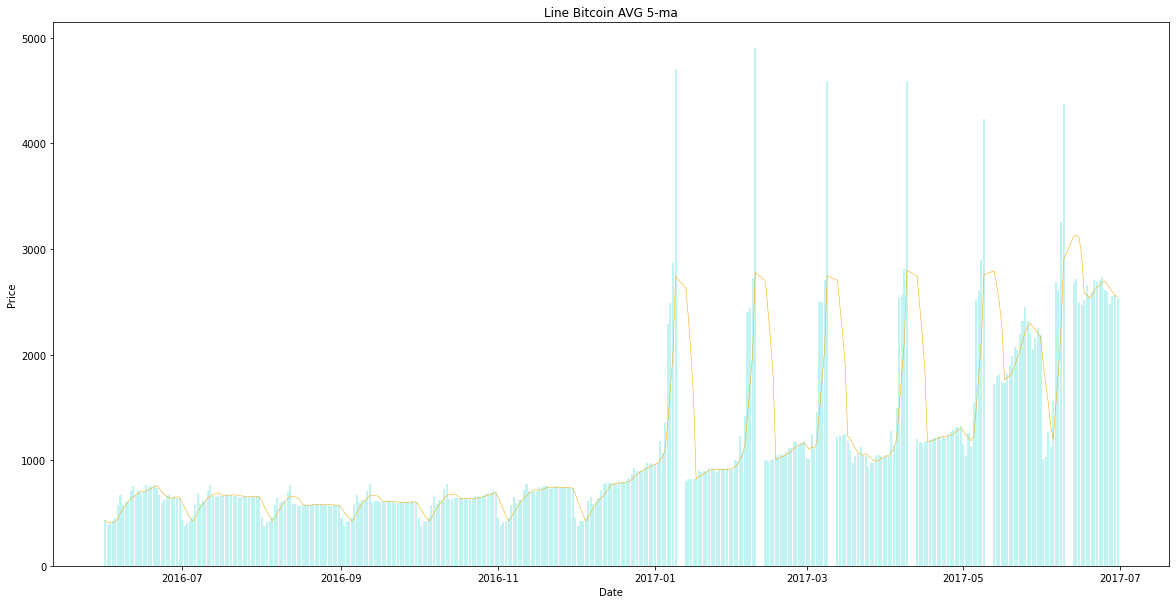

In [314]:
plt.figure(figsize=(20,10))
plt.plot(setcoin['Date'],setcoin['AVG'], color='#f2a900',linestyle="-",linewidth=0.5)
plt.bar(setcoin['Date'],setcoin['Open'], color="#c2f3f3")
plt.title('Line Bitcoin AVG 5-ma')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [291]:
Ethereum = pd.read_csv('./ETH_day.csv')
Ethereum['Date'] = pd.to_datetime(Ethereum['Date'])

In [306]:
setEth = Ethereum.loc[(Ethereum['Date'] >= datetime.strptime('2016-06-01','%Y-%m-%d')) & (Ethereum['Date'] < datetime.strptime('2017-07-01','%Y-%m-%d'))]
setEth = setEth.sort_values('Date',ascending=True)
setEth = setEth.drop(['Symbol','High','Low','Close','Volume ETH','Volume USD'], axis=1)


In [307]:
queue = deque()
data = []
for i in setEth['Open']:
    queue.append(i)
    data.append(round(np.mean(queue),2))
    if len(queue) >= 5:
        queue.popleft()
setEth=setEth.assign(AVG=data)

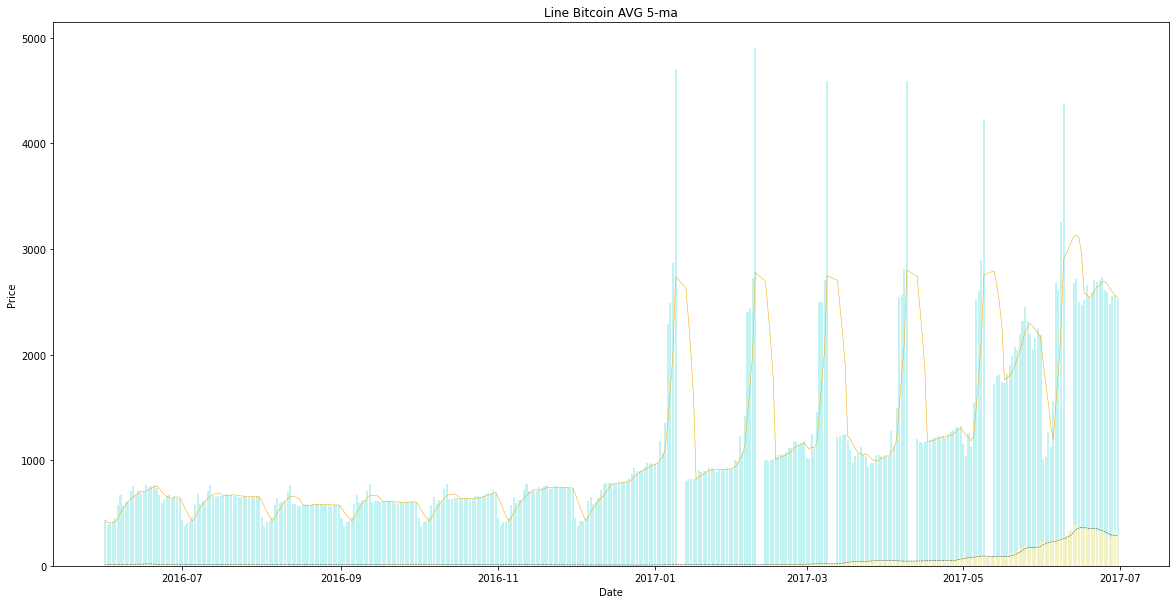

In [313]:
plt.figure(figsize=(20,10))
plt.plot(setcoin['Date'],setcoin['AVG'], color='#f2a900',linestyle="-",linewidth=0.5)
plt.plot(setEth['Date'],setEth['AVG'], color='#3c3c3d',linestyle='--',linewidth=0.5)
plt.bar(setcoin['Date'],setcoin['Open'], color="#c2f3f3")
plt.bar(setEth['Date'],setEth['Open'],color="#f3f3c2")
plt.title('Line Bitcoin AVG 5-ma')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()